In [ ]:
import croparray as ca
ca1 = ca.open_croparray(
    "/mnt/tsnas2/galindo/1_Imaging_Data/2_Comparing_Translation_methods/12xST_KDM5B/XBP1/WT_XBP1/20251217_FCS/WT/DataAnalysis/Cell01.nc"
)

In [7]:
import croparray as ca
ca2 = ca.open_croparray("/mnt/tsnas2/galindo/1_Imaging_Data/2_Comparing_Translation_methods/12xST_KDM5B/FCS_data/20250826_FCS/DataAnalysis/Cell02.nc"
)

In [1]:
import croparray as ca
ca3 = ca.open_croparray("/mnt/tsnas2/galindo/1_Imaging_Data/2_Comparing_Translation_methods/12xST_KDM5B/XBP1/SA_XBP1/DataAnalysis/Cell01.nc"
)


In [2]:
ca3.ops.apply(ca.tools.binarize_crop_manual, channels=[0], source="best_z", out_name="ch{ch}_mask_manual", func_kwargs=dict(th1=2000, close_px=1, smooth_px=1, fill_holes=False, return_uint8=True), compute_sum_xy=True, sum_name="{out}_area_px");

In [3]:
import napari
viewer = napari.Viewer()
temp = ca3.plot.montage(row='n', col='n').best_z 
temp_ch0 = ca.tools.montage(ca3, row = 'n', col = 'n').ch0_mask_manual
viewer.add_image(temp.sel(ch=0), colormap='red', name='TRNL', blending='additive', contrast_limits=[0,temp.sel(ch=0).fillna(0).data.max()])
viewer.add_image(temp_ch0, colormap='yellow', name='ch_spots', blending='additive', contrast_limits=[0,temp_ch0.data.max()])

<Image layer 'ch_spots' at 0x7a6dd3bfea10>

In [8]:
ca2.ops.apply(ca.tools.binarize_crop_manual, channels=[0], source="best_z", out_name="ch{ch}_mask_manual", func_kwargs=dict(th1=500, close_px=1, smooth_px=1, fill_holes=False, return_uint8=True), compute_sum_xy=True, sum_name="{out}_area_px");

In [17]:
ca2.measure.mask_props(source="ch0_mask_manual", props=("major_axis_length_px","eccentricity","solidity"));

In [ ]:
ca3.measure.mask_props(source="ch0_mask_manual", props=("major_axis_length_px","eccentricity","solidity"));

In [21]:
ecc2 = ca2.ds["ch0_mask_manual__eccentricity"]
{
    "mean":   ecc2.mean().item(),
    "median": ecc2.median().item(),
    "std":    ecc2.std().item(),
}

{'mean': 0.5167359420090947,
 'median': 0.5775704328592198,
 'std': 0.23671452158448608}

In [22]:
ecc3 = ca3.ds["ch0_mask_manual__eccentricity"]
{
    "mean":   ecc3.mean().item(),
    "median": ecc3.median().item(),
    "std":    ecc3.std().item(),
}

{'mean': 0.5763184074048664,
 'median': 0.6517635393847102,
 'std': 0.26090072206606085}

In [9]:
import napari
viewer = napari.Viewer()
temp = ca2.plot.montage(row='n', col='n').best_z 
temp_ch0 = ca2.plot.montage(row = 'n', col = 'n').ch0_mask_manual
viewer.add_image(temp.sel(ch=0), colormap='red', name='TRNL', blending='additive', contrast_limits=[0,temp.sel(ch=0).fillna(0).data.max()])
viewer.add_image(temp_ch0, colormap='yellow', name='ch_spots', blending='additive', contrast_limits=[0,temp_ch0.data.max()])

<Image layer 'ch_spots' at 0x7a6dbc1e7c40>

In [8]:
ta1 = ca.crop_array_tools.track_array(ca1, as_object=True)
ta2 = ca.crop_array_tools.track_array(ca2, as_object=True)
ta3 = ca.crop_array_tools.track_array(ca3, as_object=True)

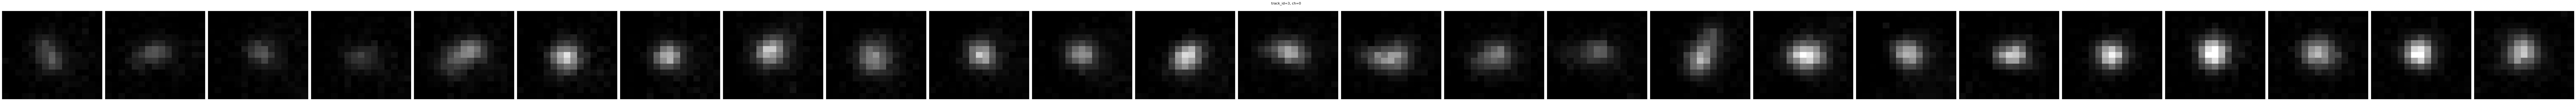

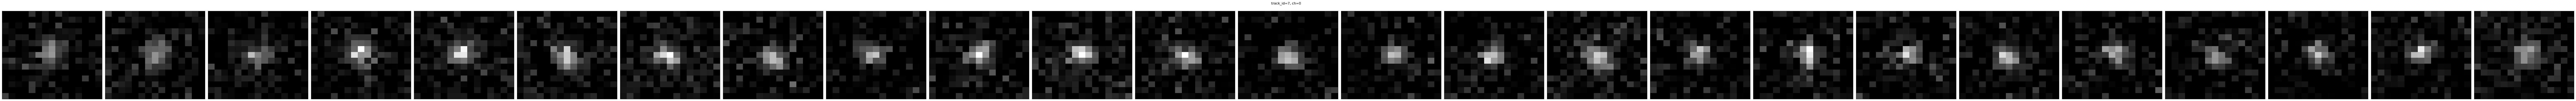

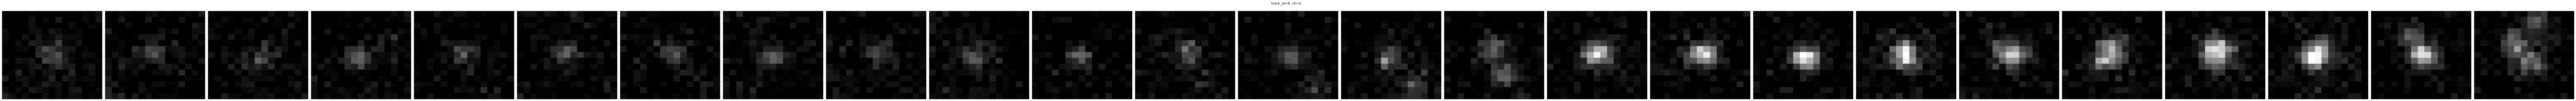

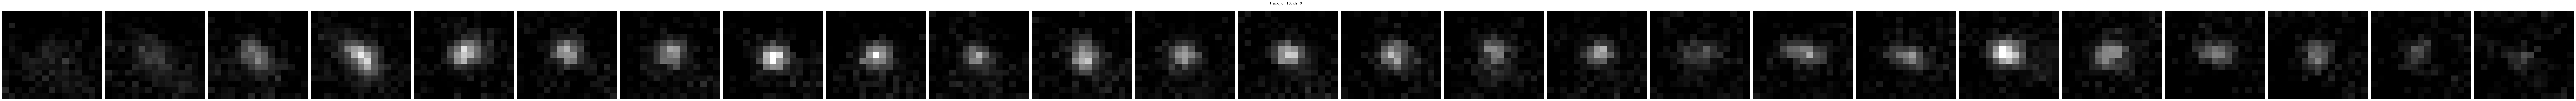

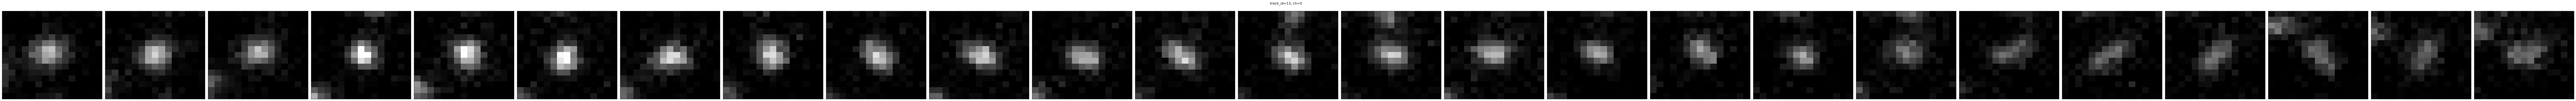

In [14]:
ta3.plot.plot_trackarray_crops(fov=0, track_id=[ 3,7,8,10,13], t=(0, 250, 10), rolling=0, quantile_range=(0.02, 0.999));

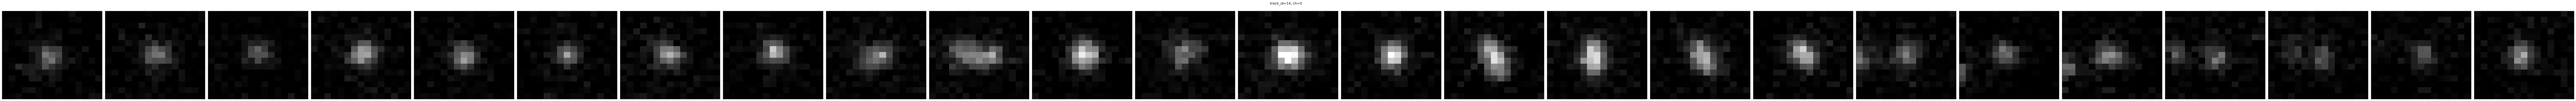

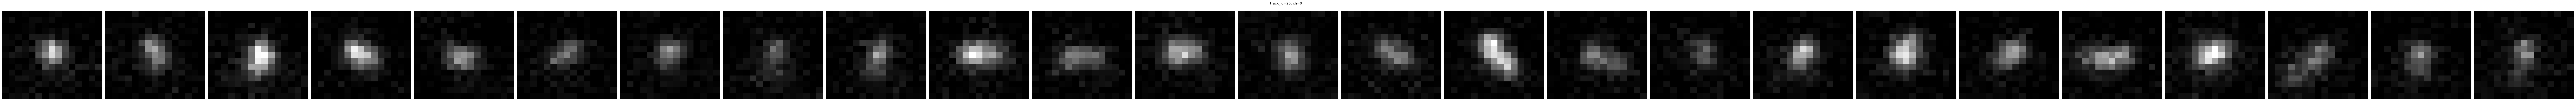

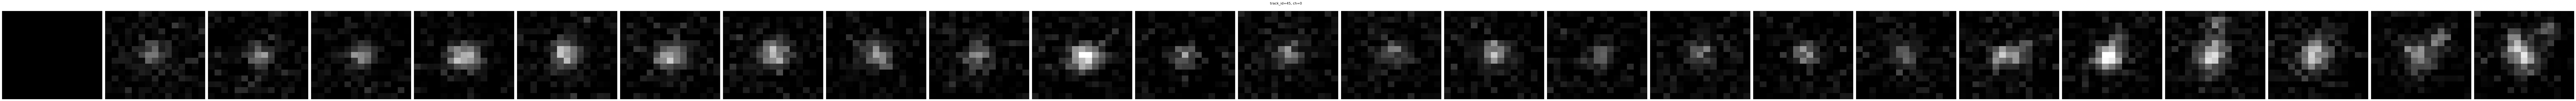

In [13]:
ta1.plot.plot_trackarray_crops(fov=0, track_id=[14,25,45], t=(0, 250, 10), rolling=1, quantile_range=(0.02, 0.999));

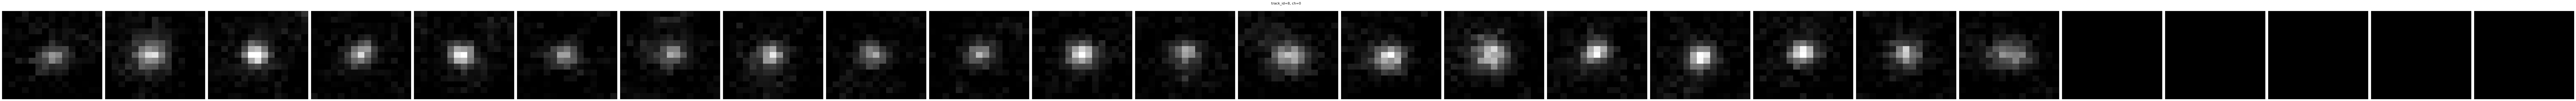

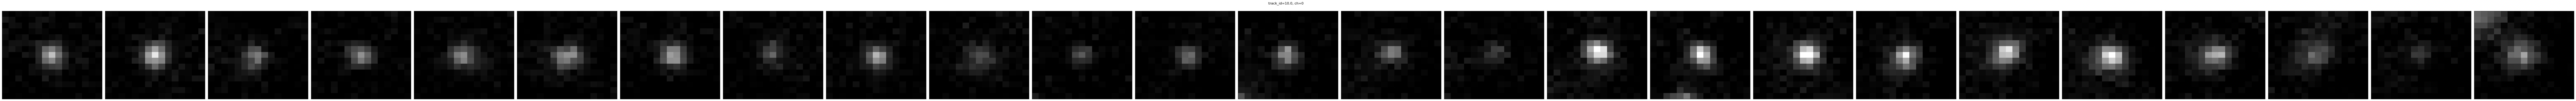

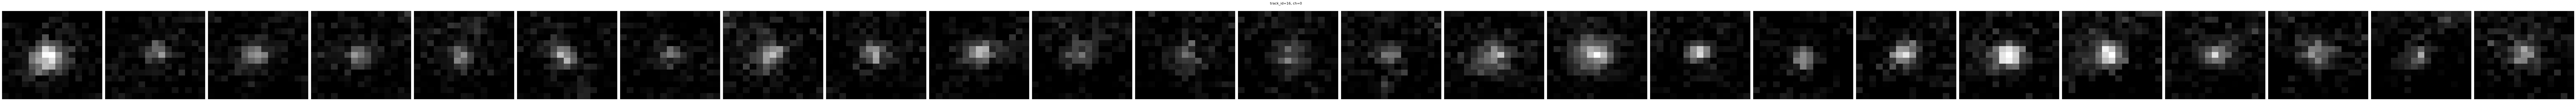

In [16]:
ta2.plot.plot_trackarray_crops(fov=0, track_id=[8,10.,16], t=(0, 250, 10), rolling=1, quantile_range=(0.02, 0.999));

/home/tstasevi/miniconda3/envs/croparray_env/lib/python3.10/site-packages/napari/_vispy/layers/scalar_field.py:197: UserWarning: data shape (2085, 16500) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  warnings.warn(
/home/tstasevi/miniconda3/envs/croparray_env/lib/python3.10/site-packages/napari/_vispy/layers/scalar_field.py:197: UserWarning: data shape (2085, 16500) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  warnings.warn(


<Image layer 'ch_spots' at 0x718b67318cd0>